Function to visualize predictions

In [8]:
import seaborn
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix, class_names):
    """
    Plots the confusion matrix.
    Args:
        confusion_matrix (dict): A dictionary containing the confusion matrix.
        class_names (list): A list of class names.
    """
    confusion_matrix = np.array([[confusion_matrix[class_name][pred_class] for pred_class in class_names] for class_name in class_names])

    plt.figure(figsize=(15, 15))
    seaborn.heatmap(confusion_matrix, annot=True, xticklabels=class_names, yticklabels=class_names, cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")

    plt.show()

In [4]:
from ultralytics import YOLO
from pathlib import Path
import tqdm
import torch



model_path = "../game/best.pt"  # Path to your trained model
test_dir = "../Datasets/val"  # Path to your test directory
# Load the trained model
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model = YOLO(model_path, verbose=False).to(device)

# Initialize counters
total = 0
correct = 0
confusion_matrix = {}
class_names = list(model.names.values())

# Initialize confusion matrix
for true_class in class_names:
    confusion_matrix[true_class] = {pred_class: 0 for pred_class in class_names}

# Get list of image paths and their true labels
test_path = Path(test_dir)
image_paths = []
true_labels = []

for class_dir in test_path.iterdir():
    if class_dir.is_dir():
        true_class = class_dir.name
        for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp']:
            for img_path in class_dir.glob(ext):
                image_paths.append(img_path)
                true_labels.append(true_class)

# Process predictions with progress bar
for img_path, true_class in tqdm.tqdm(zip(image_paths, true_labels), total=len(image_paths)):
    # Run prediction
    results = model(img_path, verbose=False)

    # Get predicted class
    predicted_class = model.names[results[0].probs.top1]

    # Update confusion matrix
    confusion_matrix[true_class][predicted_class] += 1

    # Update counters
    total += 1
    if predicted_class == true_class:
        correct += 1

Using device: cuda


100%|██████████| 101417/101417 [27:14<00:00, 62.06it/s]



Total images: 101417
Correct predictions: 101022
Accuracy: 0.9961


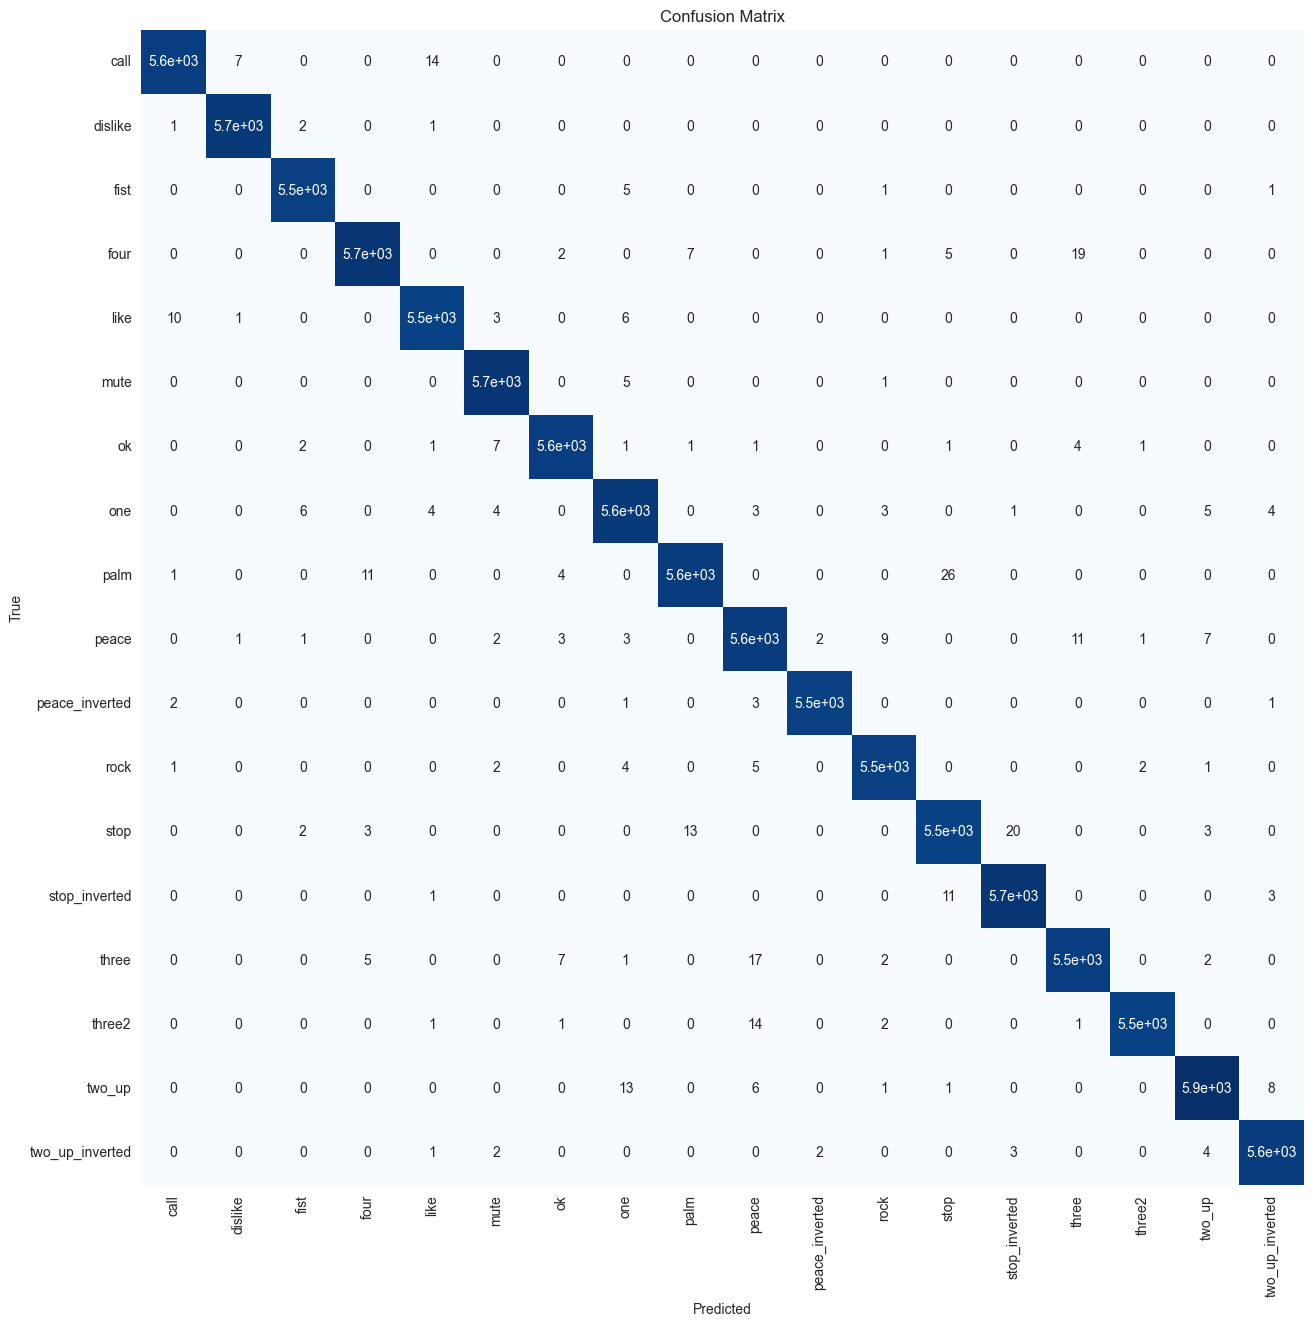


Most confused classes: palm and stop


In [12]:

# Calculate accuracy
accuracy = correct / total if total > 0 else 0

# Print results
print(f"\nTotal images: {total}")
print(f"Correct predictions: {correct}")
print(f"Accuracy: {accuracy:.4f}")

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix, class_names)
# Most confused classes
cm_copy = confusion_matrix.copy()
cm_copy = np.array([[cm_copy[class_name][pred_class] for pred_class in class_names] for class_name in class_names])
np.fill_diagonal(cm_copy, 0)
most_confused = np.unravel_index(np.argmax(cm_copy), cm_copy.shape)
print(f"\nMost confused classes: {class_names[most_confused[0]]} and {class_names[most_confused[1]]}")